# Fully Connected Neural Network(Pytorch) 
# Classify fashion items in the Fashion-MNIST dataset

## Abstract
You will build a four-layer fully-connected neural network through the well-known deep learning framework pytorch, analyze 60,000 training set images and 10,000 test set images in the Fashion-MNIST dataset, and observe the training error and verification error with the training algebra. 

Firstly, an ordinary four-layer fully connected neural network was built. After training, it was found that the fitting was obvious. Reduce the overfitting by the Dropout method. You will master image classification, accuracy and error analysis, build a fully connected neural network and perform gradient descent training through the Adam algorithm.


![Fashion-MNIST Dataset ](https://upload-images.jianshu.io/upload_images/13714448-e0d2b1be2bb1702e.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)


In [1]:
import torch

In [2]:
torch.__version__

'1.1.0'

# Download Fasion-MNIST Dataset

Covers positive images of 70,000 different products from 10 classification. 
The size, format, and training set/test set partitioning of Fashion-MNIST is identical to the original MNIST. 

60000/10000 training test data division, 28x28 grayscale picture. 
You can use it directly to test the performance of your machine learning and deep learning algorithms without changing any code.


[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist/blob/master/README.md)


In [3]:
import torch  
from torch import nn, optim  
import torch.nn.functional as F 
from torchvision import datasets, transforms 

In [4]:
# Data preprocessing: normalize image data so that grayscale data is between -1 and +1
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

# Download the Fashion-MNIST training dataset and build the training set data loader trainloader, each time loading 64 images from the training set.
trainset = datasets.FashionMNIST('dataset/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download the Fashion-MNIST testing dataset and build the training set data loader trainloader, each time loading 64 images from the training set.
testset = datasets.FashionMNIST('dataset/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

## Display image

The corresponding label for this image is Trouser


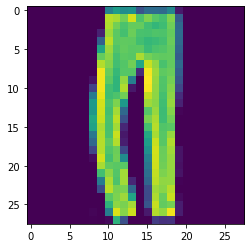

In [5]:
image, label = next(iter(trainloader))

#There are 64 images, we look at the image with index 3.
imagedemo = image[3]
imagedemolabel = label[3]

imagedemo = imagedemo.reshape((28,28))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(imagedemo)

labellist = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(f'The corresponding label for this image is {labellist[imagedemolabel]}')

# Open the image in the dataset

In [6]:
image, label = next(iter(trainloader))

In [7]:
image.shape

torch.Size([64, 1, 28, 28])

In [8]:
label

tensor([3, 8, 9, 1, 0, 7, 9, 7, 7, 5, 9, 0, 6, 7, 3, 6, 2, 8, 7, 0, 6, 0, 4, 9,
        1, 4, 4, 3, 2, 9, 9, 4, 3, 4, 0, 8, 9, 6, 3, 7, 7, 3, 0, 4, 7, 2, 4, 5,
        0, 8, 4, 3, 9, 3, 8, 8, 6, 7, 1, 3, 6, 3, 1, 5])

"Label" contains the label corresponding to the 64 images in the "image"

| Label | Description |
| --- | --- |
| 0 | T-shirt/top|
| 1 | Trouser|
| 2 | Pullover|
| 3 | Dress|
| 4 | Coat|
| 5 | Sandal|
| 6 | Shirt|
| 7 | Sneaker|
| 8 | Bag|
| 9 | Ankle boot|

## Open a image in the training dataset

In [9]:
imagedemo = image[2]
imagedemolabel = label[2]

In [10]:
imagedemo.shape

torch.Size([1, 28, 28])

In [11]:
imagedemo = imagedemo.reshape((28,28))

In [12]:
imagedemo.shape

torch.Size([28, 28])

In [13]:
imagedemolabel

tensor(9)

The corresponding label for this image is Ankle boot


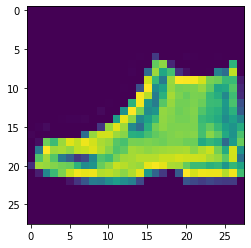

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(imagedemo)

labellist = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(f'The corresponding label for this image is {labellist[imagedemolabel]}')

# Build and train a four-layer fully connected neural network

The input to the neural network is 28 * 28 = 784 pixels<br>
The first hidden layer contains 256 neurons<br>
The second hidden layer contains 128 neurons<br>
The third hidden layer contains 64 neurons<br>
The output layer outputs 10 results, corresponding to 10 classification of images.<br>

![全连接神经网络](https://upload-images.jianshu.io/upload_images/13714448-c8b5fa11504798bf.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

In [15]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [16]:
model = Classifier()

criterion = nn.NLLLoss()

# The optimization method is the Adam gradient descent method with a learning rate of 0.003.
optimizer = optim.Adam(model.parameters(), lr=0.003)

# Learn all the data in the training dataset 15 times. The larger the number, the longer the training time.
epochs = 15

# Store training and test errors for each training in both lists.
train_losses, test_losses = [], []

print('Training')
for e in range(epochs):
    running_loss = 0
    
    for images, labels in trainloader:
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # Do the following operations each time you finish the dataset
    else:
        test_loss = 0
        accuracy = 0
        # No need to open automatic derivation and back propagation when testing
        with torch.no_grad():
            # Close Dropout
            model.eval()
            
            for images, labels in testloader:
    
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                
                # The right side of the equal sign predicts the correct proportion of each batch of 64 test images.
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        # Open Dropout
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Learning times: {}/{}.. ".format(e+1, epochs),
              "training loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Validation loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "accuracy: {:.3f}".format(accuracy/len(testloader)))

Training
Learning times: 1/15..  training loss: 0.518..  Validation loss: 0.459..  accuracy: 0.836
Learning times: 2/15..  training loss: 0.396..  Validation loss: 0.401..  accuracy: 0.857
Learning times: 3/15..  training loss: 0.360..  Validation loss: 0.396..  accuracy: 0.861
Learning times: 4/15..  training loss: 0.336..  Validation loss: 0.391..  accuracy: 0.860
Learning times: 5/15..  training loss: 0.318..  Validation loss: 0.373..  accuracy: 0.870
Learning times: 6/15..  training loss: 0.306..  Validation loss: 0.399..  accuracy: 0.861
Learning times: 7/15..  training loss: 0.296..  Validation loss: 0.378..  accuracy: 0.864
Learning times: 8/15..  training loss: 0.285..  Validation loss: 0.368..  accuracy: 0.875
Learning times: 9/15..  training loss: 0.280..  Validation loss: 0.388..  accuracy: 0.873
Learning times: 10/15..  training loss: 0.268..  Validation loss: 0.369..  accuracy: 0.874
Learning times: 11/15..  training loss: 0.262..  Validation loss: 0.394..  accuracy: 0.873

# Verify model performance

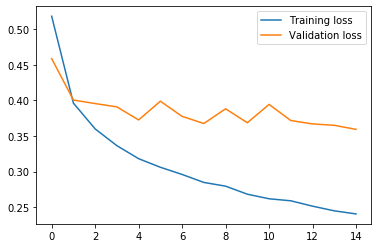

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend()

It can be seen that although the training loss has been declining, the validation loss is still high.<br> 
(Our neural network is like a high-scoring and low-energy classmate.<br>
Usually, all the answers to the after-school questions are memorized.)<br>
<br>
Sometimes the predicted probability is only 30 to 40 percent of the grasp.

The neural network guesses the image is T-shirt，probability is 63.13992142677307%


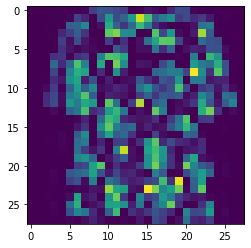

In [40]:
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
img = img.reshape((28,28)).numpy()
plt.imshow(img)

# Convert test images to one-dimensional column vectors
img = torch.from_numpy(img)
img = img.view(1, 784)

# Perform forward inference to predict the classification of the image
with torch.no_grad():
    output = model.forward(img)
ps = torch.exp(output)

top_p, top_class = ps.topk(1, dim=1)
labellist = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
prediction = labellist[top_class]
probability = float(top_p)
print(f'The neural network guesses the image is {prediction}，probability is {probability*100}%')

# Use the Dropout method to prevent overfitting

#Large-scale neural networks have two disadvantages：<br>
1.Spend long time.<br>
2.Overfitting<br>
<br>
The Dropout is a good solution to this problem. Every time you do a dropout, it is equivalent to finding a thinner network from the original network.

![Dropout](https://raw.githubusercontent.com/stdcoutzyx/Blogs/master/blogs/imgs/n7-1.png)

In [44]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        # Randomly "die" 20% of neurons during each training session to prevent overfitting.
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        # Make sure that the input tensor is an expanded single-column data, compressing the three dimensions of the channel, length, and width of each image into one column.
        x = x.view(x.shape[0], -1)
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [45]:
model = Classifier()

criterion = nn.NLLLoss()

# The optimization method is the Adam gradient descent method with a learning rate of 0.003.
optimizer = optim.Adam(model.parameters(), lr=0.003)

# Learn all the data in the training dataset 15 times. The larger the number, the longer the training time.
epochs = 15

# Store training and test errors for each training in both lists.
train_losses, test_losses = [], []

print('Training')
for e in range(epochs):
    running_loss = 0
    
    for images, labels in trainloader:
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # Do the following operations each time you finish the dataset
    else:
        test_loss = 0
        accuracy = 0
        # No need to open automatic derivation and back propagation when testing
        with torch.no_grad():
            # Close Dropout
            model.eval()
            
            for images, labels in testloader:
    
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                
                # The right side of the equal sign predicts the correct proportion of each batch of 64 test images.
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        # Open Dropout
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Learning times: {}/{}.. ".format(e+1, epochs),
              "training loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Validation loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "accuracy: {:.3f}".format(accuracy/len(testloader)))

Training
Learning times: 1/15..  training loss: 0.608..  Validation loss: 0.505..  accuracy: 0.818
Learning times: 2/15..  training loss: 0.484..  Validation loss: 0.463..  accuracy: 0.831
Learning times: 3/15..  training loss: 0.454..  Validation loss: 0.477..  accuracy: 0.825
Learning times: 4/15..  training loss: 0.434..  Validation loss: 0.405..  accuracy: 0.855
Learning times: 5/15..  training loss: 0.421..  Validation loss: 0.409..  accuracy: 0.855
Learning times: 6/15..  training loss: 0.415..  Validation loss: 0.408..  accuracy: 0.855
Learning times: 7/15..  training loss: 0.400..  Validation loss: 0.408..  accuracy: 0.859
Learning times: 8/15..  training loss: 0.401..  Validation loss: 0.398..  accuracy: 0.861
Learning times: 9/15..  training loss: 0.402..  Validation loss: 0.390..  accuracy: 0.858
Learning times: 10/15..  training loss: 0.390..  Validation loss: 0.400..  accuracy: 0.862
Learning times: 11/15..  training loss: 0.383..  Validation loss: 0.399..  accuracy: 0.865

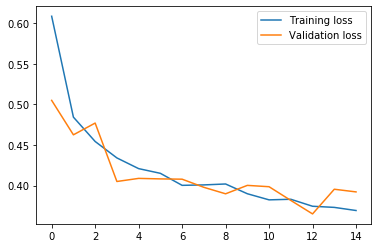

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend()

It can be seen that the Training loss and the Validation loss are gradually reduced as the number of learning increases.

The neural network guesses the image is Sneaker，probability is 99.97482895851135%


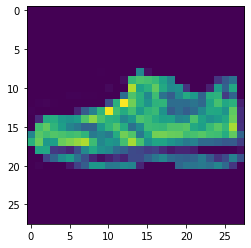

In [69]:
model.eval()
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
img = img.reshape((28,28)).numpy()
plt.imshow(img)

# Convert test images to one-dimensional column vectors
img = torch.from_numpy(img)
img = img.view(1, 784)

# Perform forward inference to predict the classification of the image
with torch.no_grad():
    output = model.forward(img)
ps = torch.exp(output)

top_p, top_class = ps.topk(1, dim=1)
labellist = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
prediction = labellist[top_class]
probability = float(top_p)
print(f'The neural network guesses the image is {prediction}，probability is {probability*100}%')